<a href="https://colab.research.google.com/github/Alishahu16/Market-Inflation/blob/main/Initial_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [ ]:
Data = pd.read_excel('Merged dataset.xlsx')

In [ ]:
Data.head()

,Year,Date,Price of Rice(per pound),Gasoline price per gallon,Milk price per gal(3.8ltr),Egg Price,Rice Inflation Rate (%),Gasoline Inflation Rate (%),Milk Inflation Rate (%),Egg Inflation Rate (%),Minimum Wage,Average Income per Person (Dollars),Multi Family House Rent,Unemployment Rate
0,2015,2015-01-01,0.692,2.219,3.758,2.113,-1.142857,-17.753892,-1.623037,-4.389140,8.38,55816,947.626911,6.3
1,2015,2015-02-01,0.689,2.264,3.496,2.088,-0.433526,2.027941,-6.971794,-1.183152,8.38,55816,996.213526,6.3
2,2015,2015-03-01,0.670,2.411,3.463,2.133,-2.757620,6.492933,-0.943936,2.155172,8.38,55816,1000.045487,6.2
3,2015,2015-04-01,0.670,2.453,3.397,2.065,0.000000,1.742016,-1.905862,-3.187998,8.38,55816,1002.550142,6.1
4,2015,2015-05-01,0.676,2.715,3.387,1.962,0.895522,10.680799,-0.294377,-4.987893,8.38,55816,971.581859,6.0


In [ ]:
# Define the weights for each item (based on their importance in the consumption basket)
weights = {
    'Rice Inflation Rate (%)': 0.135,
    'Gasoline Inflation Rate (%)': 3.261,
    'Milk Inflation Rate (%)': 0.174,
    'Egg Inflation Rate (%)': 1.725
}

# Calculate the overall inflation as a weighted sum of individual inflation rates
Data['Overall Inflation Rate (%)'] = (
    Data['Rice Inflation Rate (%)'] * weights['Rice Inflation Rate (%)'] +
    Data['Gasoline Inflation Rate (%)'] * weights['Gasoline Inflation Rate (%)'] +
    Data['Milk Inflation Rate (%)'] * weights['Milk Inflation Rate (%)'] +
   Data['Egg Inflation Rate (%)'] * weights['Egg Inflation Rate (%)']
)

In [ ]:
Data.head()

,Year,Date,Price of Rice(per pound),Gasoline price per gallon,Milk price per gal(3.8ltr),Egg Price,Rice Inflation Rate (%),Gasoline Inflation Rate (%),Milk Inflation Rate (%),Egg Inflation Rate (%),Minimum Wage,Average Income per Person (Dollars),Multi Family House Rent,Unemployment Rate,Overall Inflation Rate (%)
0,2015,2015-01-01,0.692,2.219,3.758,2.113,-1.142857,-17.753892,-1.623037,-4.389140,8.38,55816,947.626911,6.3,-65.903402
1,2015,2015-02-01,0.689,2.264,3.496,2.088,-0.433526,2.027941,-6.971794,-1.183152,8.38,55816,996.213526,6.3,3.300559
2,2015,2015-03-01,0.670,2.411,3.463,2.133,-2.757620,6.492933,-0.943936,2.155172,8.38,55816,1000.045487,6.2,24.354603
3,2015,2015-04-01,0.670,2.453,3.397,2.065,0.000000,1.742016,-1.905862,-3.187998,8.38,55816,1002.550142,6.1,-0.150203
4,2015,2015-05-01,0.676,2.715,3.387,1.962,0.895522,10.680799,-0.294377,-4.987893,8.38,55816,971.581859,6.0,26.295643


In [ ]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [ ]:
summary_stats = Data.describe().transpose()

In [ ]:
summary_stats['Median'] = Data.median()
summary_stats['Range'] = summary_stats['max'] - summary_stats['min']


In [ ]:
# Save the summary statistics to a CSV file for reference
summary_stats.to_csv('summary_statistics.csv', index=True)

# Display the summary statistics
print(summary_stats)

                                     count                           mean  \
Year                                 116.0                    2019.344828   
Date                                   116  2019-10-16 13:14:28.965517312   
Price of Rice(per pound)             116.0                       0.797388   
Gasoline price per gallon            116.0                       2.886155   
Milk price per gal(3.8ltr)           116.0                        3.45381   
Egg Price                            116.0                       2.018647   
Rice Inflation Rate (%)              116.0                       0.406323   
Gasoline Inflation Rate (%)          116.0                        0.36241   
Milk Inflation Rate (%)              116.0                       0.064282   
Egg Inflation Rate (%)               116.0                       0.736486   
Minimum Wage                         116.0                      10.760345   
Average Income per Person (Dollars)  116.0                   63032.482759   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

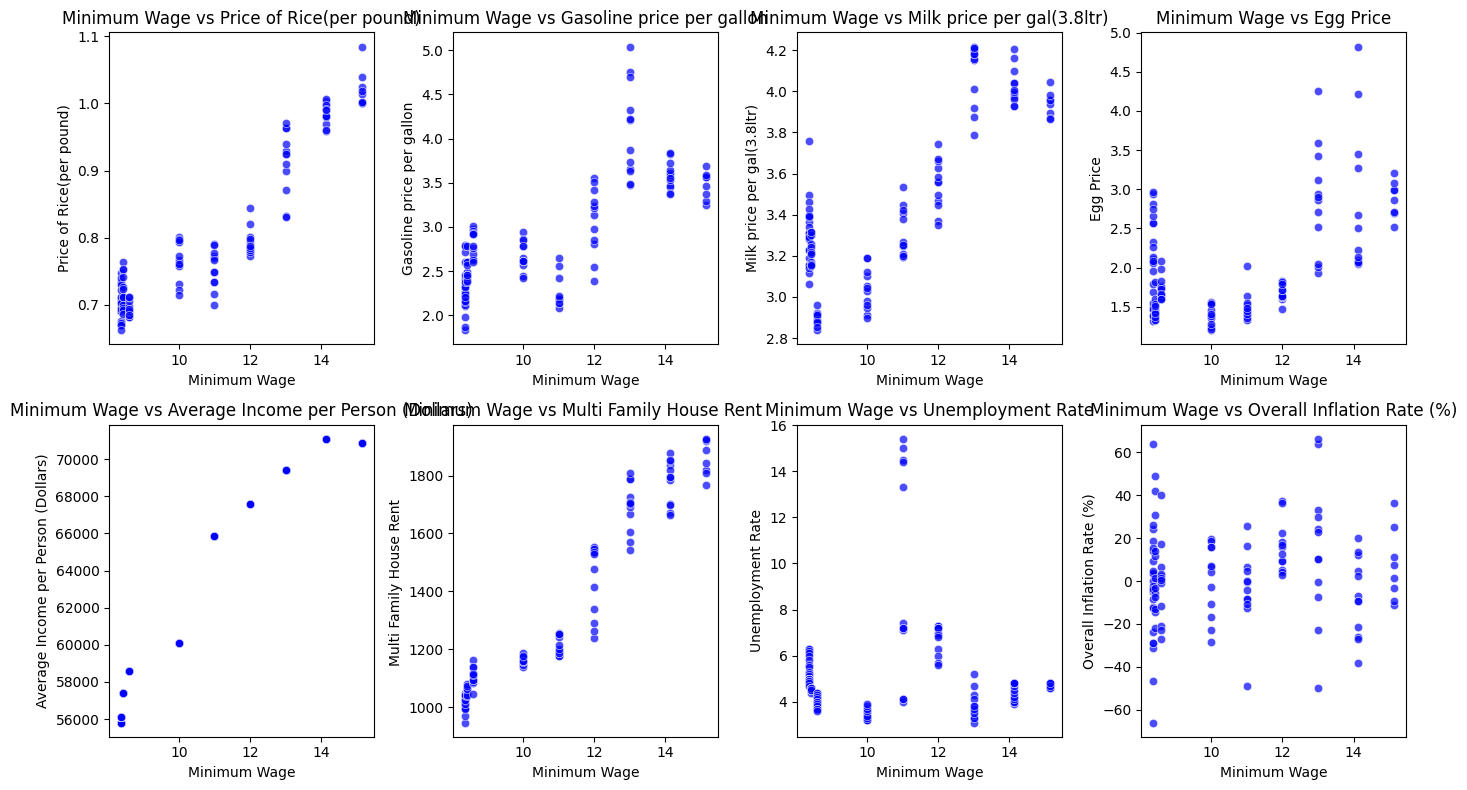

In [ ]:
# Scatter Plots: Individual relationships with Minimum Wage

related_columns = ['Price of Rice(per pound)', 'Gasoline price per gallon', 'Milk price per gal(3.8ltr)', 'Egg Price',
                   'Average Income per Person (Dollars)', 'Multi Family House Rent ', 'Unemployment Rate', 'Overall Inflation Rate (%)']

plt.figure(figsize=(14, 8))
for i, col in enumerate(related_columns, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=Data, x='Minimum Wage', y=col, color='b', alpha=0.7)
    plt.title(f'Minimum Wage vs {col}')
    plt.xlabel('Minimum Wage')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
Data = Data.rename(columns={
    'Price of Rice(per pound)': 'Rice Price (per pound)',
    'Gasoline price per gallon': 'Gasoline Price (per gallon)',
    'Milk price per gal(3.8ltr)': 'Milk Price (per gallon)',
    'Average Income per Person (Dollars)': 'Avg Income (Dollars)',
    'Multi Family House Rent ': 'MF Rent'
})

In [ ]:
Data.head()

,Year,Date,Rice Price (per pound),Gasoline Price (per gallon),Milk Price (per gallon),Egg Price,Rice Inflation Rate (%),Gasoline Inflation Rate (%),Milk Inflation Rate (%),Egg Inflation Rate (%),Minimum Wage,Avg Income (Dollars),MF Rent,Unemployment Rate,Overall Inflation Rate (%)
0,2015,2015-01-01,0.692,2.219,3.758,2.113,-1.142857,-17.753892,-1.623037,-4.389140,8.38,55816,947.626911,6.3,-65.903402
1,2015,2015-02-01,0.689,2.264,3.496,2.088,-0.433526,2.027941,-6.971794,-1.183152,8.38,55816,996.213526,6.3,3.300559
2,2015,2015-03-01,0.670,2.411,3.463,2.133,-2.757620,6.492933,-0.943936,2.155172,8.38,55816,1000.045487,6.2,24.354603
3,2015,2015-04-01,0.670,2.453,3.397,2.065,0.000000,1.742016,-1.905862,-3.187998,8.38,55816,1002.550142,6.1,-0.150203
4,2015,2015-05-01,0.676,2.715,3.387,1.962,0.895522,10.680799,-0.294377,-4.987893,8.38,55816,971.581859,6.0,26.295643


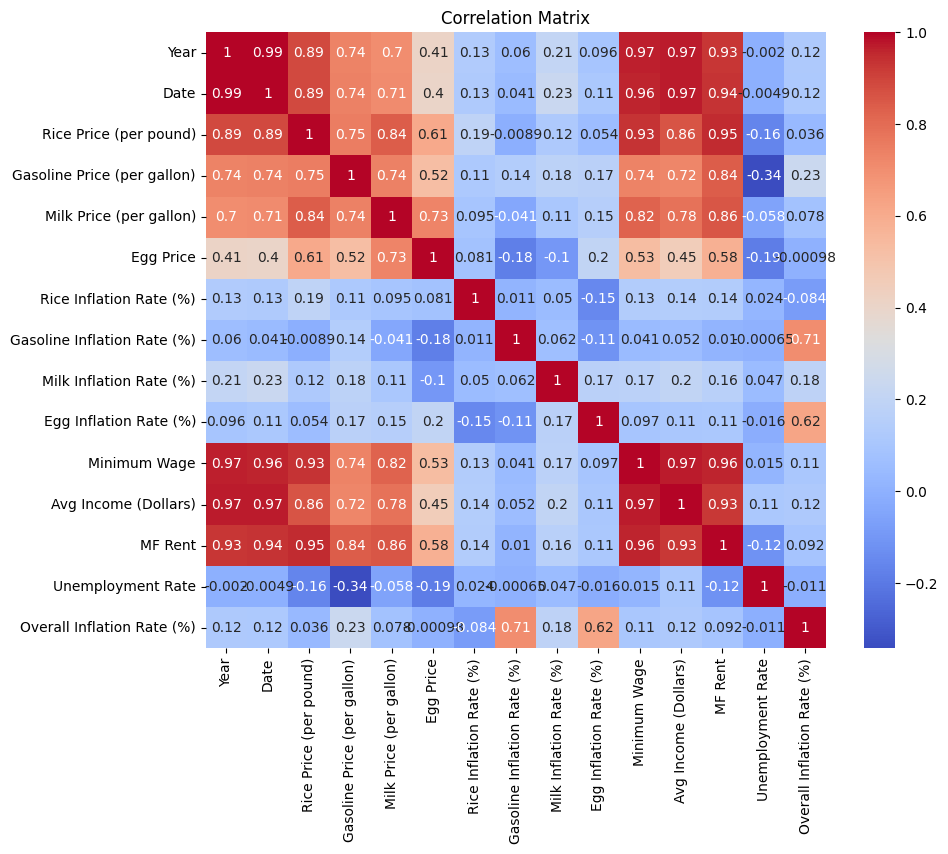

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your dataset
corr_matrix = Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Independent Variables
X = Data[['Rice Inflation Rate (%)', 'Gasoline Inflation Rate (%)', 'Milk Inflation Rate (%)',
          'Egg Inflation Rate (%)', 'Minimum Wage', 'Avg Income (Dollars)',
          'MF Rent', 'Unemployment Rate']]
y = Data['Overall Inflation Rate (%)']  # Target variable


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 1: Initial Model without Tuning for Baseline Comparison
initial_model = RandomForestRegressor(random_state=42)
initial_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predictions and initial evaluation
initial_preds = initial_model.predict(X_test)
initial_mse = mean_squared_error(y_test, initial_preds)
initial_r2 = r2_score(y_test, initial_preds)

print("Initial Model - Mean Squared Error:", initial_mse)
print("Initial Model - R^2 Score:", initial_r2)

Initial Model - Mean Squared Error: 113.22385517134744
Initial Model - R^2 Score: 0.8477316601517537


In [ ]:
# Step 2: Fine-Tuning with Grid Search for Enhanced Model
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [10, 20, 30, None],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2']  # Number of features considered for splitting
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Step 3: Robustness Check - Comparing Performance Across Models
y_pred = best_model.predict(X_test)

# Final Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Model - Best Parameters:", best_params)
print("Tuned Model - Mean Squared Error:", mse)
print("Tuned Model - R^2 Score:", r2)

Tuned Model - Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model - Mean Squared Error: 231.01600762290528
Tuned Model - R^2 Score: 0.6893196764420773


In [ ]:
# Step 4: Comparing Initial and Tuned Model Performance
improvement = initial_mse - mse
print("Performance Improvement (MSE Reduction):", improvement)

# Step 5: Further Robustness Checks
# - Running multiple random states to check consistency
# - Testing on subsets of the data (e.g., different time periods if available)
for state in [0, 42, 100, 2023]:
    model_test = RandomForestRegressor(**best_params, random_state=state)
    model_test.fit(X_train, y_train)
    preds_test = model_test.predict(X_test)
    mse_test = mean_squared_error(y_test, preds_test)
    print(f"Random State {state} - Mean Squared Error:", mse_test)

Performance Improvement (MSE Reduction): -117.79215245155784
Random State 0 - Mean Squared Error: 240.20960421049736
Random State 42 - Mean Squared Error: 231.01600762290528
Random State 100 - Mean Squared Error: 224.2420249029311
Random State 2023 - Mean Squared Error: 214.11712794716513


In [ ]:
import shap

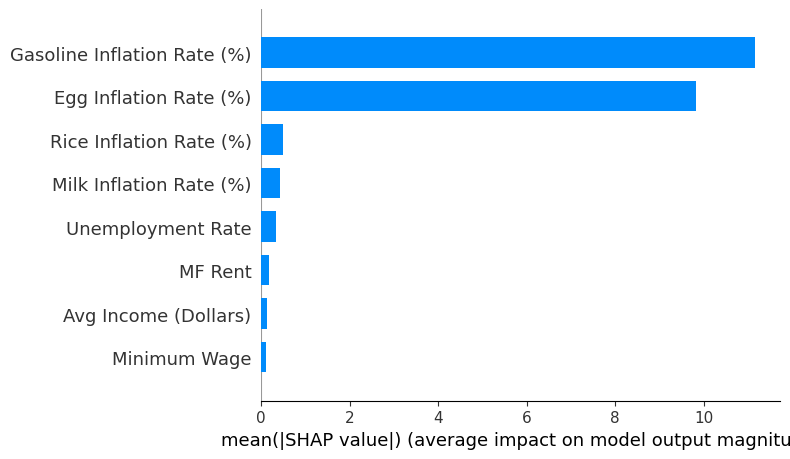

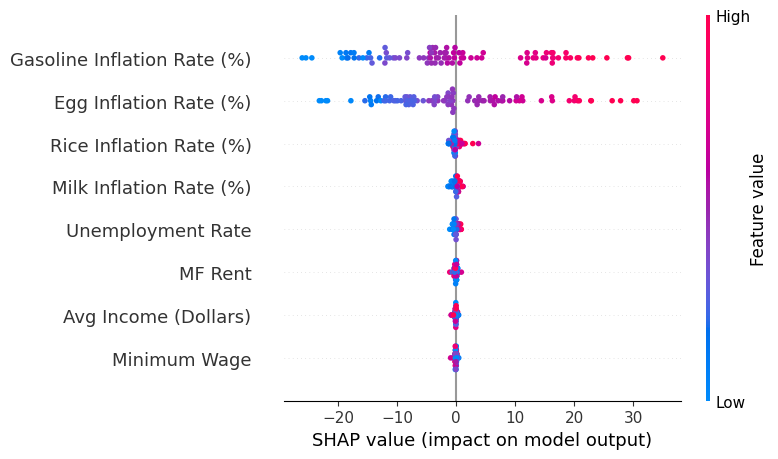

In [ ]:
# Initialize the SHAP explainer with the trained model and the training data
explainer = shap.TreeExplainer(initial_model)
shap_values = explainer.shap_values(X_train)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed summary plot showing the effect of each feature
shap.summary_plot(shap_values, X_train)

# Here, let's explain the first prediction in the test set
shap.initjs()  # Initialize JavaScript for interactive plots in notebooks
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[0])

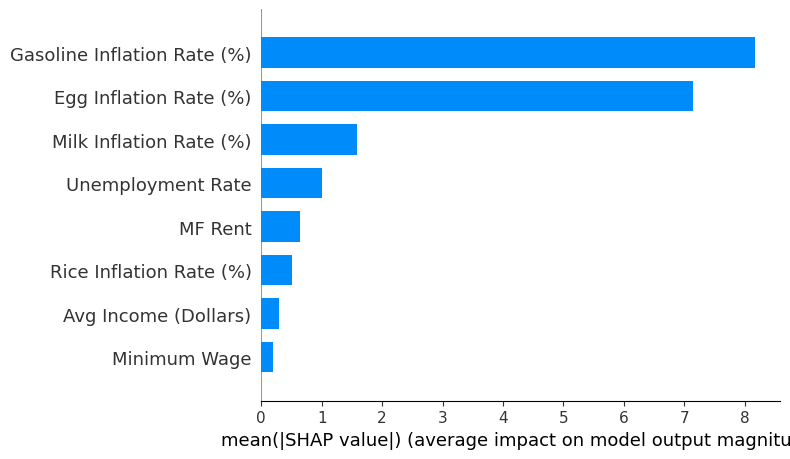

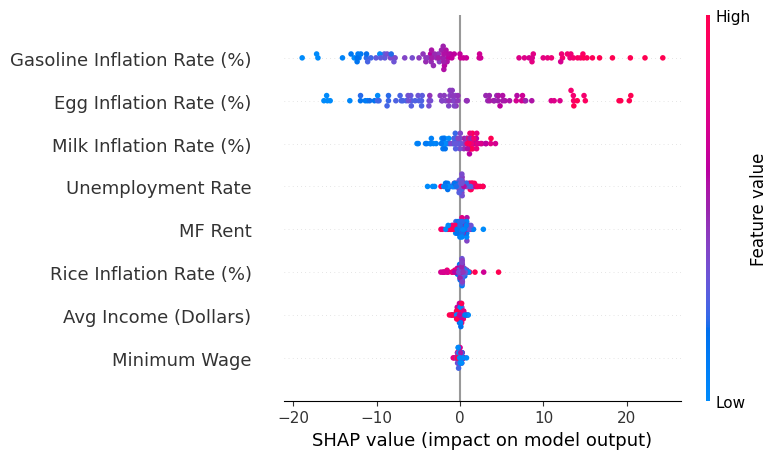

In [ ]:
# Initialize the SHAP explainer with the trained model and the training data
explainer2 = shap.TreeExplainer(best_model)
shap_values = explainer2.shap_values(X_train)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed summary plot showing the effect of each feature
shap.summary_plot(shap_values, X_train)

# Here, let's explain the first prediction in the test set
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values[0], X_train.iloc[0])

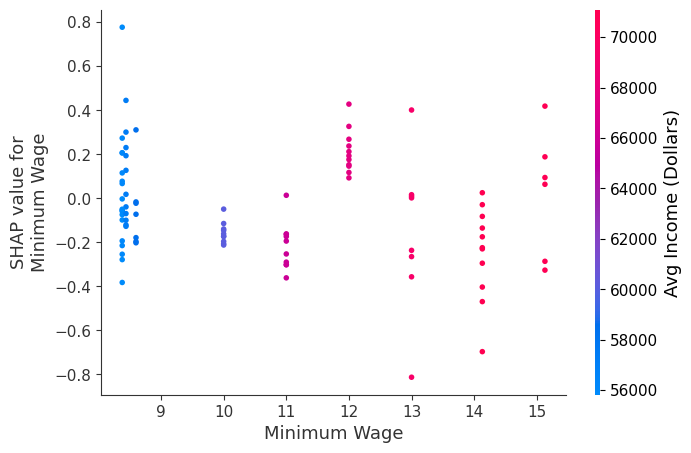

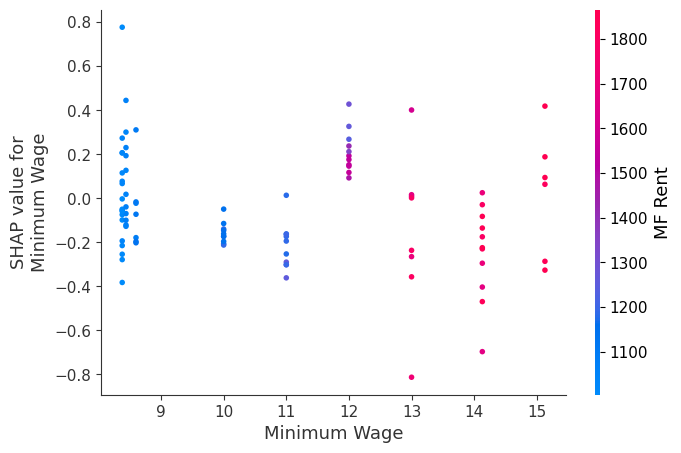

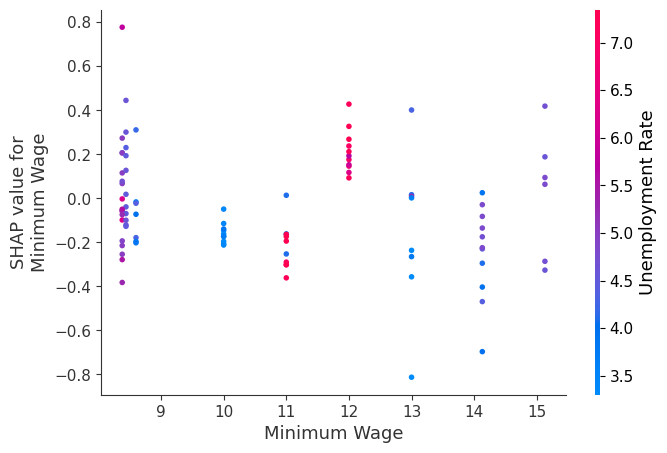

In [ ]:

# Plot dependence between Minimum Wage and another feature
shap.dependence_plot('Minimum Wage', shap_values, X_train, interaction_index='Avg Income (Dollars)')
shap.dependence_plot('Minimum Wage', shap_values, X_train, interaction_index='MF Rent')
shap.dependence_plot('Minimum Wage', shap_values, X_train, interaction_index='Unemployment Rate')

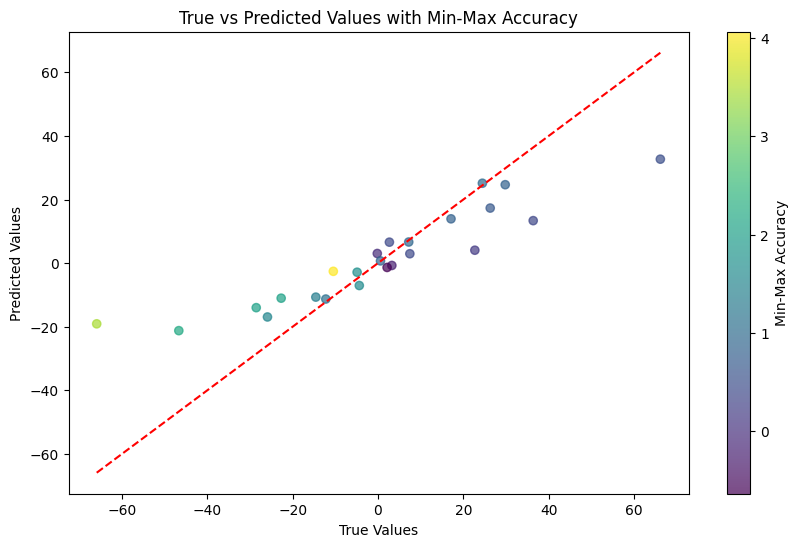

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Min-Max Accuracy per prediction
min_max_accuracies = np.minimum(y_test, y_pred) / np.maximum(y_test, y_pred)

# Scatter plot of True vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=min_max_accuracies, cmap='viridis', alpha=0.7)
plt.colorbar(label='Min-Max Accuracy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for y = x
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values with Min-Max Accuracy')
plt.show()

In [ ]:
min_max_accuracies

,Overall Inflation Rate (%)
83,0.405603
4,0.658378
42,-0.224683
40,0.813982
10,1.082837
47,2.058532
110,0.395425
36,-0.634985
70,-0.053756
11,1.712036


In [ ]:
min_max_accuracies.mean()

1.1278471740556923